IMPORTINGE FILES AND FILTERING ROWS AND COLUMNS

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats

#reading file
data = pd.read_excel('full_data.xlsx')

#filter/rename columns
data = data[["RECIPE","STATUS","PRESSAO DIFERENCIAL POSITIVA","PRESSAO DIFERENCIAL NEGATIVA"]]
data = data.rename(columns={\
    "PRESSAO ACUMULADA": "ACCUMULATE PRESSURE",\
    "PRESSAO HELIO": "HELIUM PRESSURE",\
    "PRESSAO DIFERENCIAL POSITIVA": "DELTA P - POSITIVE",\
    "PRESSAO DIFERENCIAL NEGATIVA": "DELTA P - NEGATIVE"\
        })

#filter rows
data = data[data['STATUS'] == "CONFORME"]
data = data[data['RECIPE'] != "prova pallet"]
data.drop("STATUS",inplace=True,axis=1)

In [3]:
data

,RECIPE,DELTA P - POSITIVE,DELTA P - NEGATIVE
0,MODEL 13,470.753967,-45.525272
1,MODEL 16,416.939697,-45.466740
2,MODEL 01,558.622131,-44.686405
3,MODEL 14,440.073181,-44.069096
4,MODEL 01,653.617432,-44.020023
...,...,...,...
288589,MODEL 04,538.208008,-16.876467
288590,MODEL 03,530.432678,-39.477665
288591,MODEL 04,512.304321,-26.619875
288592,MODEL 16,493.213745,-0.037231


ELBOW + ZSCORE

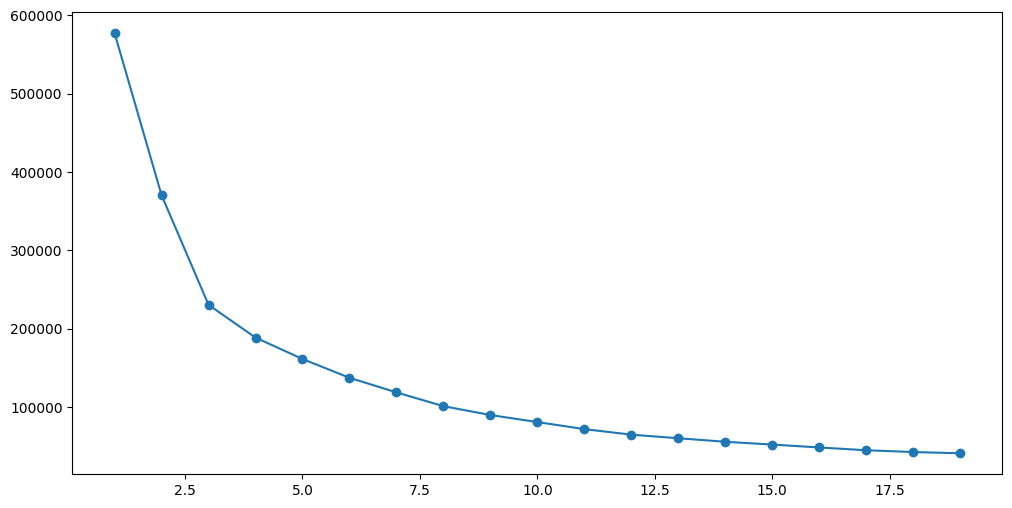

In [4]:
data_z = data #remove index before apply zscore
data_z.iloc[:,1:] = stats.zscore(data_z.iloc[:,1:])


#starting elbow
distortion = [] 
elbow_range = range(1,20)

#for each elemento of elbow_range (1~~20), fit the model, find distortion and append distortion/k to arrays
for k in elbow_range:
    kmeans = KMeans(n_clusters = k,random_state=0)
    kmeans.fit(data_z.iloc[:,1:])
    distortion.append(kmeans.inertia_)
   
#plot K vs distortion 
plt.figure(figsize=(12,6))
plt.plot(elbow_range, distortion, marker='o')


data_z PREVIEW

In [5]:
data_z #show head
#data_z.describe() #statistics (average, standard deviation, max, min...)
#data_z['RECIPE'].unique() #show unique recipes
#data_z.info() #table formatting

,RECIPE,DELTA P - POSITIVE,DELTA P - NEGATIVE
0,MODEL 13,0.286828,-2.203162
1,MODEL 16,-0.517631,-2.197488
2,MODEL 01,1.600352,-2.121848
3,MODEL 14,-0.171813,-2.062010
4,MODEL 01,3.020419,-2.057253
...,...,...,...
288589,MODEL 04,1.295186,0.573856
288590,MODEL 03,1.178954,-1.616948
288591,MODEL 04,0.907956,-0.370603
288592,MODEL 16,0.622575,2.206136


data_z VISUALIZATION

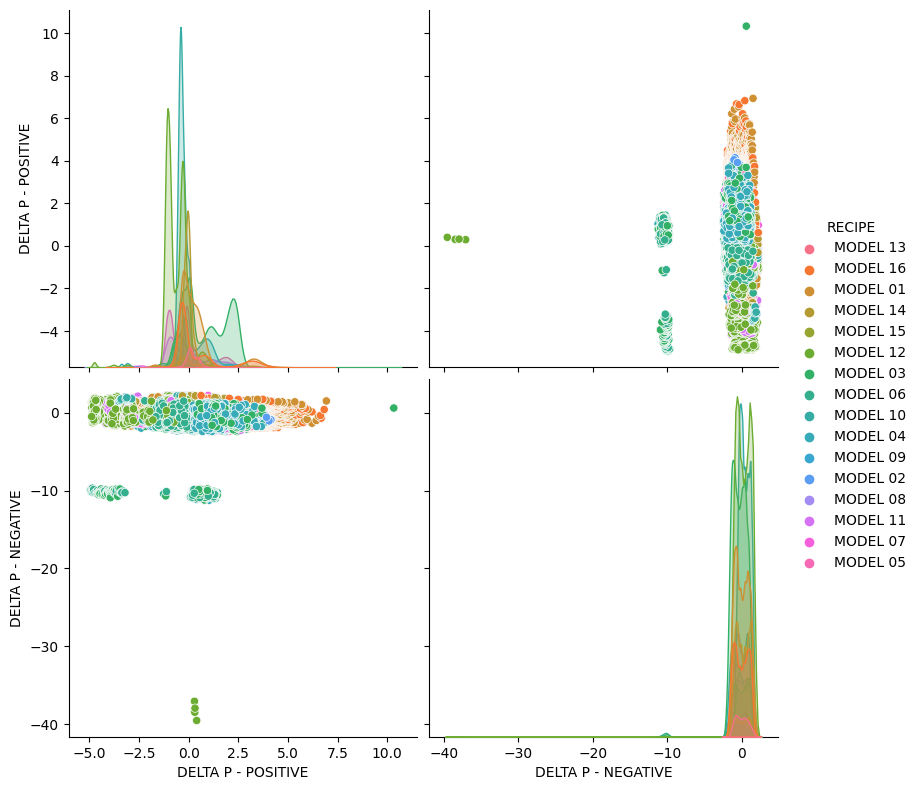

In [6]:
p=sns.pairplot(data, hue = 'RECIPE',height=4)


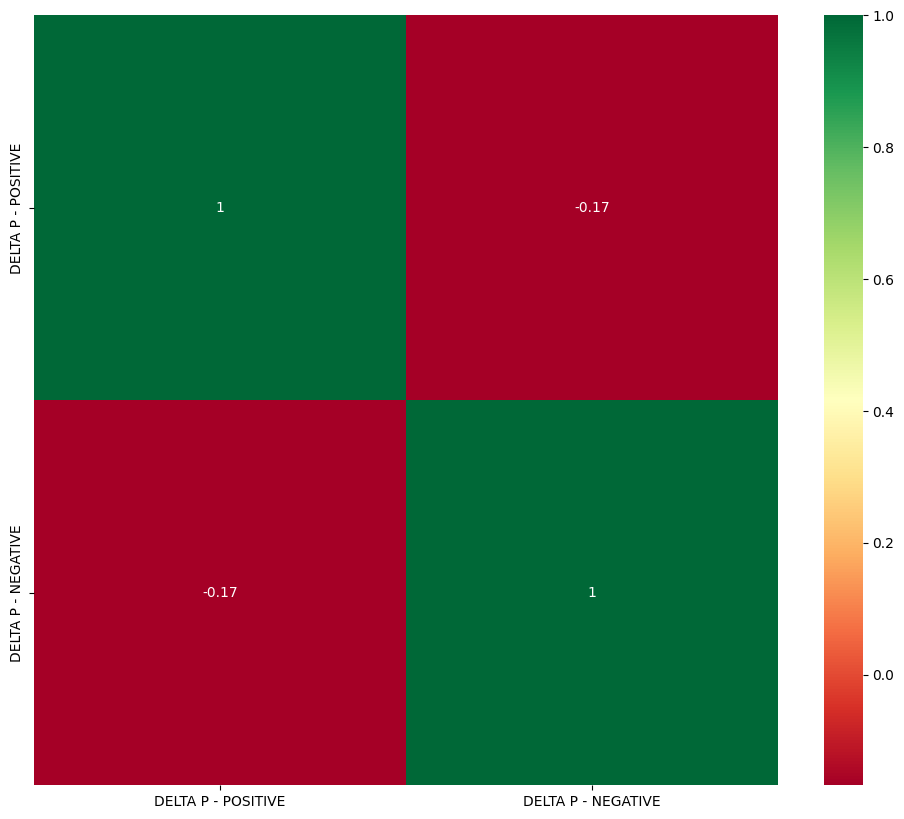

In [7]:
#heatmap
plt.figure(figsize=(12,10)) 
p=sns.heatmap(data_z.iloc[:,1:].corr(), annot=True,cmap ='RdYlGn')  

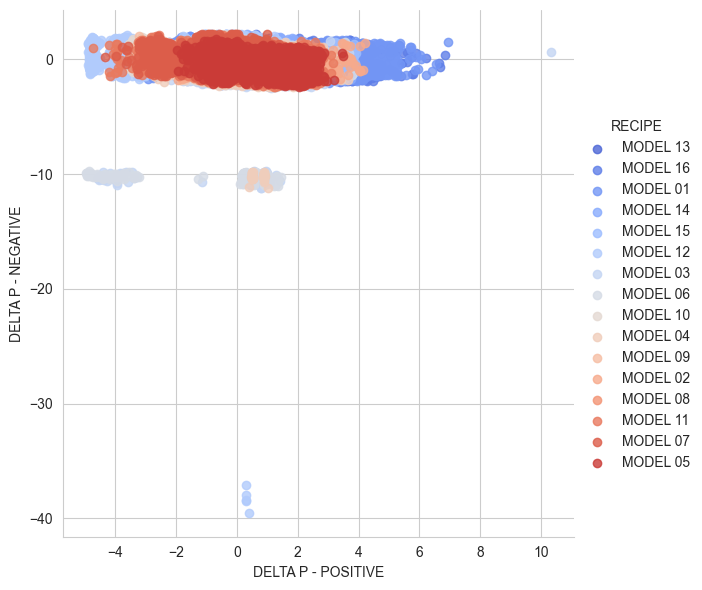

In [8]:
#pair plot all features, grouping recipes by colors
#sns.pairplot(data_z.iloc[:,:], hue="RECIPE") 

#scatterplot, creating correlation between 2 columns (x y) and recipes (colors)
sns.set_style('whitegrid')
sns.lmplot(x='DELTA P - POSITIVE',y='DELTA P - NEGATIVE',data=data_z, hue='RECIPE',palette='coolwarm',height=6,aspect=1,fit_reg=False,legend="He Pressure vs Accumulate Pressure - By Recipe")
#sns.lmplot(x='MIN. POSITIVE DEFORMATION - 01',y='MIN. NEGATIVE DEFORMATION - 01',data_z=data_z, hue='RECIPE',palette='coolwarm',height=6,aspect=1,fit_reg=False,legend="He Pressure vs Accumulate Pressure - By Recipe")

           
#check a specific column values range
#sns.set_style('darkgrid')
#g = sns.FacetGrid(data_z_z,hue="RECIPE",palette='coolwarm',height=6,aspect=2)
#g = g.map(plt.hist,'P ACUMULADA',bins=20,alpha=0.7)



STARTING KMEANS

In [9]:
kmeans = KMeans(n_clusters = 5) #K = 5 took from elbow method
kmeans.fit(data_z.iloc[:,1:7]) #fitting model
pred = kmeans.predict(data_z.iloc[:,1:7]) #making predict
data['Prediction'] = pred #adding a column with the clusters TO ORIGINAL DATA
pd.Series(pred).value_counts()

2    93885
3    84047
0    72948
1    37289
4      425
dtype: int64

CLUSTERS data_z VISUALIZATION

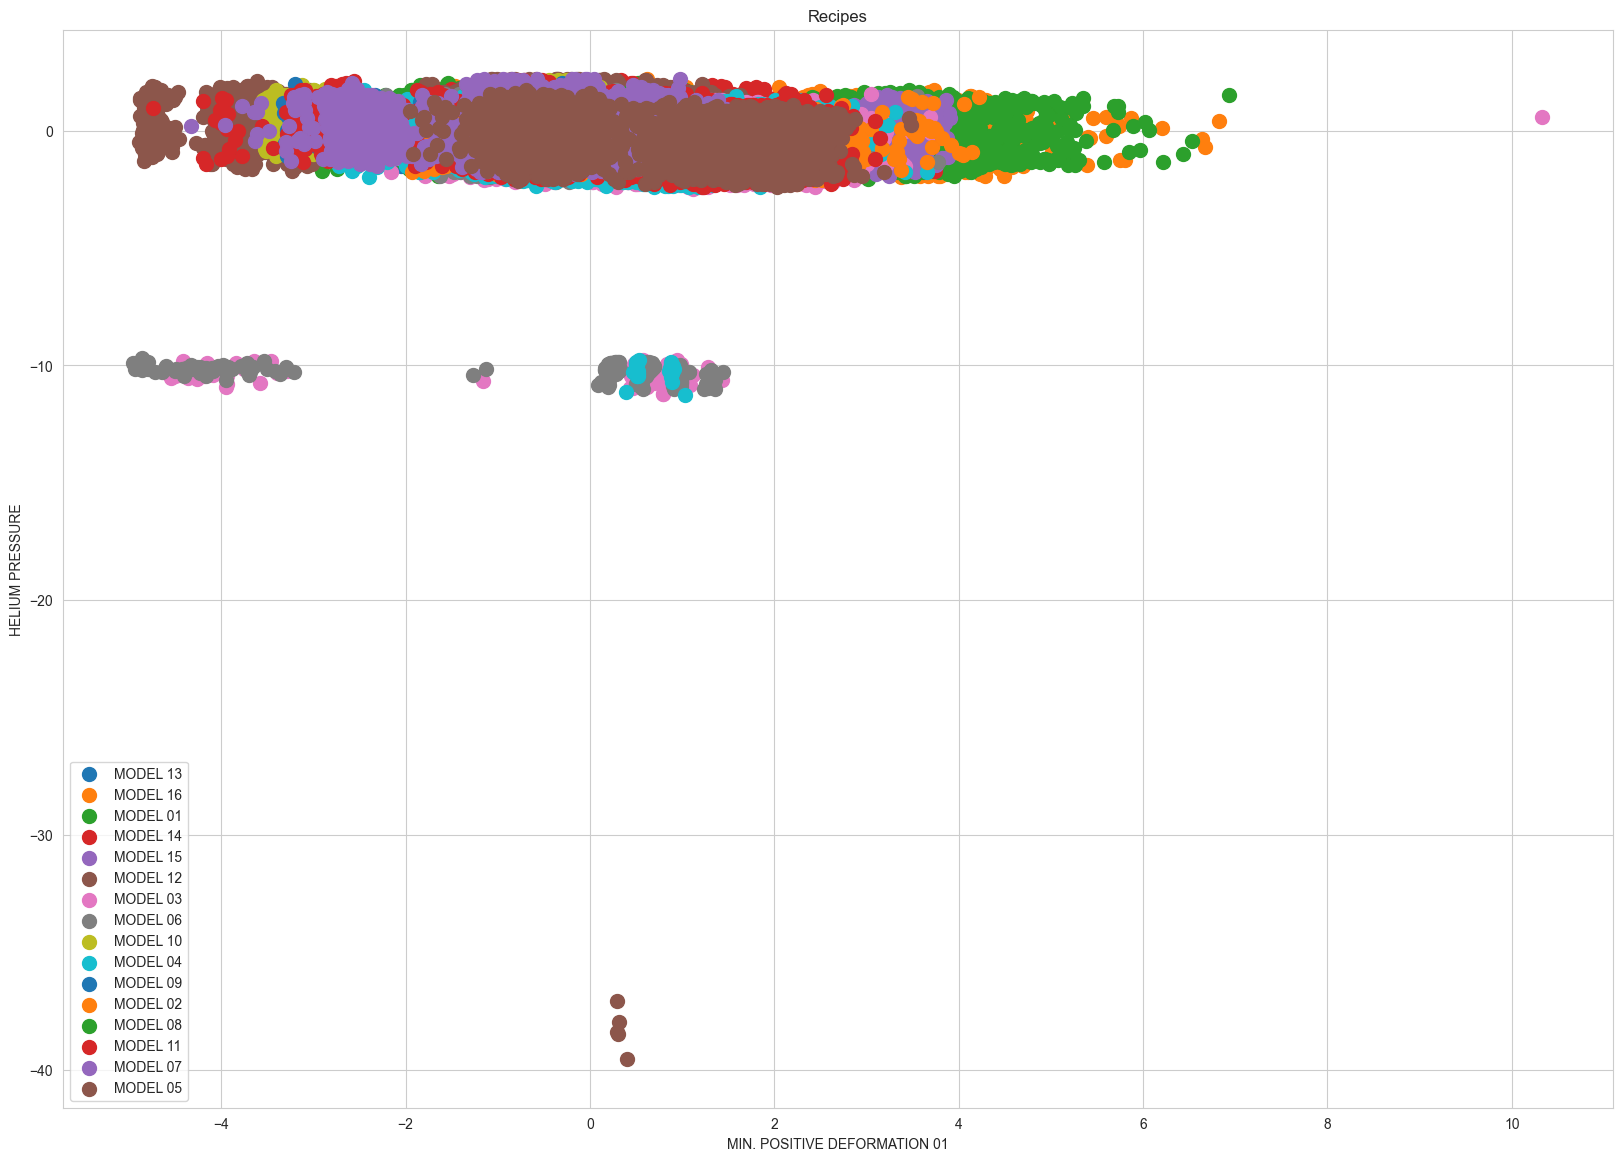

In [10]:
#VIEWING ALL RECIPES SCATTERPLOT
plt.figure(figsize=(20,14))
for each in data_z['RECIPE'].unique(): #get every recipe type from original databse
    plt.scatter(data_z[data_z['RECIPE'] == each].iloc[:,1],data_z[data_z['RECIPE']==each].iloc[:,2],s=100,label = each)    
    
plt.title("Recipes")
plt.xlabel("MIN. POSITIVE DEFORMATION 01")
plt.ylabel("HELIUM PRESSURE")
plt.legend()

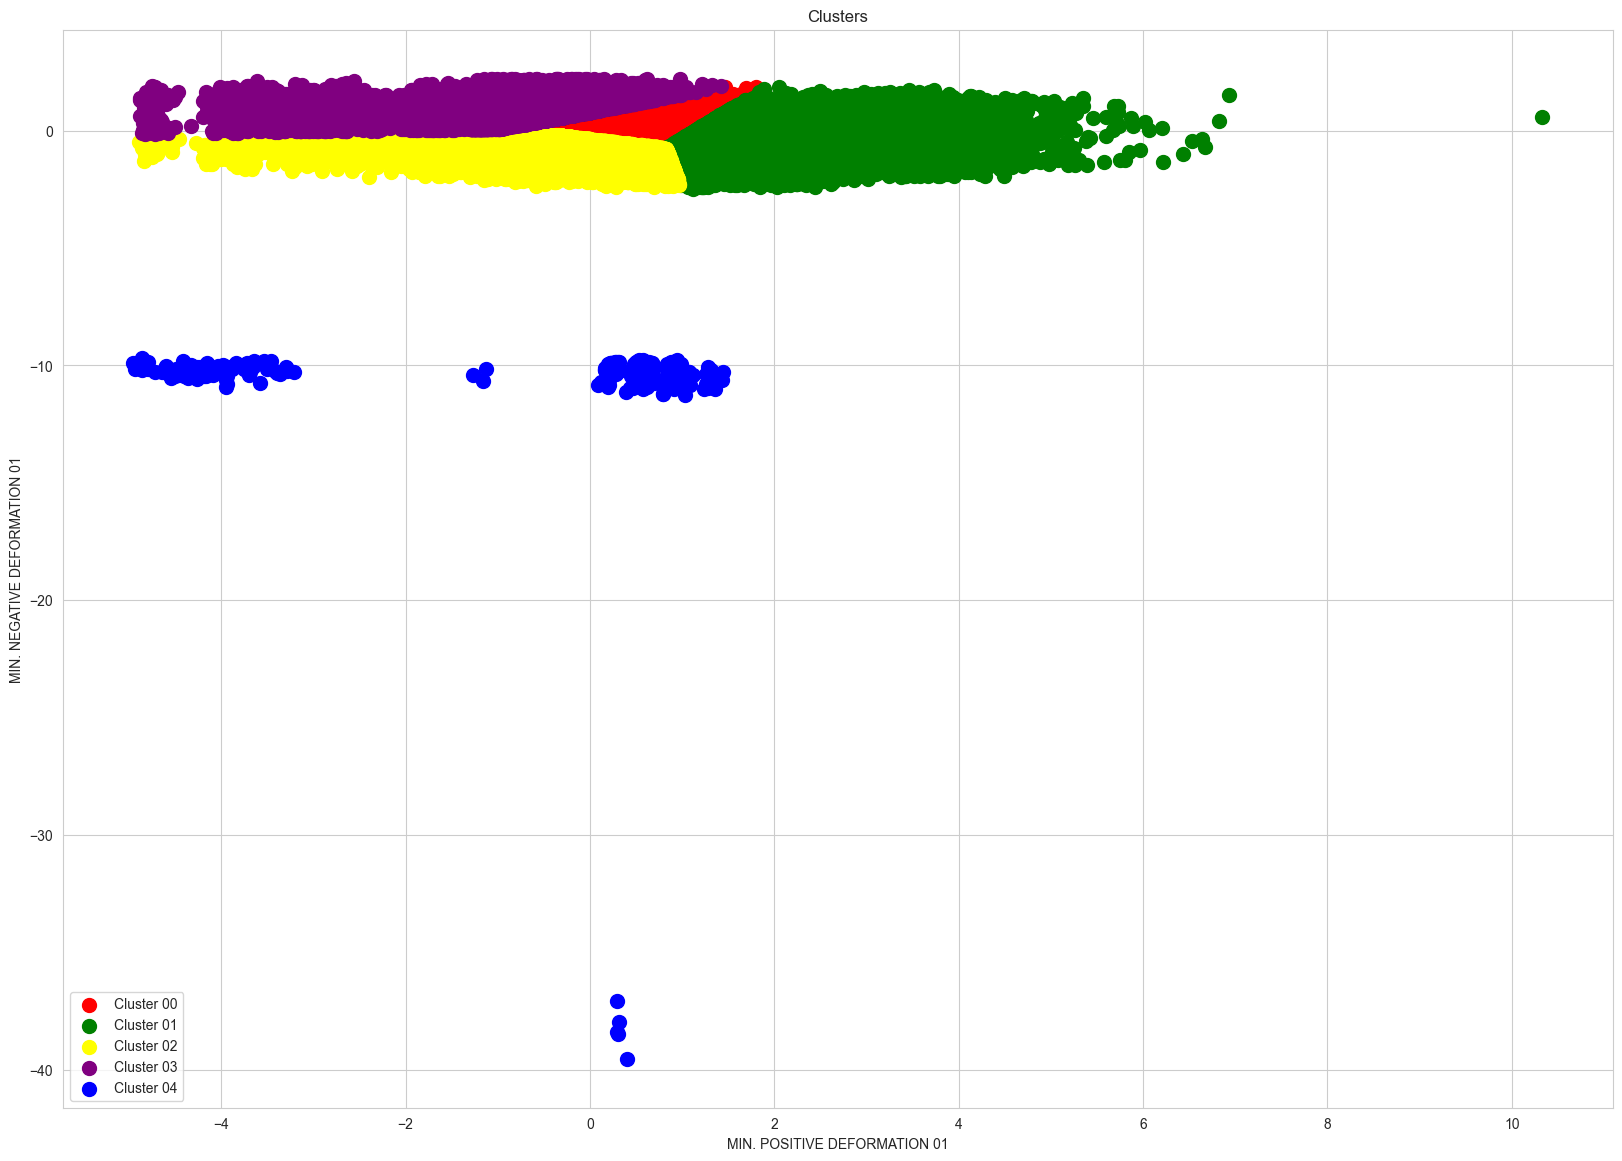

In [11]:
#scatterplot show clusters created
plt.figure(figsize=(20,14))

plt.scatter(data_z[data_z['Prediction'] == 0].iloc[:,1], data_z[data_z['Prediction'] == 0].iloc[:,2],s=100, c = 'red', label = 'Cluster 00')
plt.scatter(data_z[data_z['Prediction'] == 1].iloc[:,1], data_z[data_z['Prediction'] == 1].iloc[:,2],s=100, c = 'green', label = 'Cluster 01')
plt.scatter(data_z[data_z['Prediction'] == 2].iloc[:,1], data_z[data_z['Prediction'] == 2].iloc[:,2],s=100, c = 'yellow', label = 'Cluster 02')
plt.scatter(data_z[data_z['Prediction'] == 3].iloc[:,1], data_z[data_z['Prediction'] == 3].iloc[:,2],s=100, c = 'purple', label = 'Cluster 03')
plt.scatter(data_z[data_z['Prediction'] == 4].iloc[:,1], data_z[data_z['Prediction'] == 4].iloc[:,2],s=100, c = 'blue', label = 'Cluster 04')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', marker = '*', label = 'Centroids')
plt.title("Clusters")
plt.xlabel("MIN. POSITIVE DEFORMATION 01")
plt.ylabel("MIN. NEGATIVE DEFORMATION 01")
plt.legend()

EVALUATING MODEL

In [16]:
#aqui fica o ''''dicionário''''
data_z['CLUSTER'] = ''
data_z.loc[data_z['Prediction'] == 0, 'CLUSTER'] = 'CLUSTER 0'
data_z.loc[data_z['Prediction'] == 1, 'CLUSTER'] = 'CLUSTER 1'
data_z.loc[data_z['Prediction'] == 2, 'CLUSTER'] = 'CLUSTER 2'
data_z.loc[data_z['Prediction'] == 3, 'CLUSTER'] = 'CLUSTER 3'
data_z.loc[data_z['Prediction'] == 4, 'CLUSTER'] = 'CLUSTER 4'
data_z.loc[data_z['Prediction'] == 5, 'CLUSTER'] = 'CLUSTER 5'


data_z.groupby('CLUSTER')['RECIPE'].value_counts()
data_z.groupby(['CLUSTER', 'RECIPE']).size()


pd.DataFrame(data_z[['CLUSTER', 'RECIPE']].query('CLUSTER == "CLUSTER 4"').value_counts())




0
CLUSTER   RECIPE       
CLUSTER 4 MODEL 06  249
          MODEL 03  140
          MODEL 04   31
          MODEL 12    5